### Code for statistical tests to compare metrics across different experimental setups

In [1]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import sys
from scipy.stats import ranksums

import numpy as np
import statsmodels.api as statmod
import matplotlib.pyplot as plt

In [2]:
# # df_final_data = pd.read_csv('results/new_results_3/SE/final_data_100.csv')
# run = str(runs[7])
# df_results_high = pd.read_csv('results/final_results/TOL/results_' + run + '0.csv')
# df_results_med = pd.read_csv('results/final_results/TOL/results_' + run + '1.csv')
# df_results_low = pd.read_csv('results/final_results/TOL/results_' + run + '2.csv')
# df_results_high.columns

In [5]:
df_1 = pd.read_csv('results/SE/results_combined_None_SE.csv')
df_2 = pd.read_csv('results/SE/results_combined_low_SE.csv')
df_3 = pd.read_csv('results/SE/results_combined_med_SE.csv')
df_4 = pd.read_csv('results/SE/results_combined_high_SE.csv')

In [6]:
# df_1 = pd.read_csv('results/final_results/TOL_avg/TOL_high_avg.csv')
# df_2 = pd.read_csv('results/final_results/TOL_avg/TOL_med_avg.csv')
# df_3 = pd.read_csv('results/final_results/TOL_avg/TOL_low_avg.csv')

In [7]:
df_1.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'topic', 'post_stance', 'author_id',
       'num_of_agents_received', 'num_of_agents_not_received',
       'num_of_spreader_agents', 'num_of_disinterested_agents',
       'network_polarization', 'net_polarization2', 'network_homophily',
       'network_homophily2', 'network_polarity', 'satisfaction', 'activity',
       'user_preference'],
      dtype='object')

In [8]:
# stats.f_oneway(df_1['net_polarization2'].iloc[0:10], df_2['net_polarization2'].iloc[0:10], df_3['net_polarization2'].iloc[0:10], df_4['net_polarization2'].iloc[0:10])
# stats.f_oneway(df_1['net_polarization2'], df_2['net_polarization2'])

In [9]:
# #create dataset with 100 values that follow a normal distribution
# data = np.random.normal(0,1,100)
# #create Q-Q plot with 45-degree line added to plot
# fig = statmod.qqplot(data, line='45')
# plt.show()

## Initial Population's Basic Distribution stats

In [10]:
from scipy.stats import skew, kurtosis

kur_ua, kur_pov, kur_pp = [], [], []
avg_pp, avg_pol, avg_ua = [], [], []
std_pp, std_pol, std_ua = [], [], []
for i in range(1,11):
    data = pd.read_csv('initial_data/initial_data_' + str(i) + '.csv')
#     print(kurtosis(data['user_activity'], bias=False), kurtosis(data['pol_inclination'], bias=False))
    avg_pp.append(data['privacy_preference'].mean())
    std_pp.append(data['privacy_preference'].std())
    avg_pol.append(data['pol_inclination'].mean())
    std_pol.append(data['pol_inclination'].std())
    avg_ua.append(data['user_activity'].mean())
    std_ua.append(data['user_activity'].std())
    kur_ua.append(kurtosis(data['user_activity'], bias=False))
    kur_pov.append(kurtosis(data['pol_inclination'], bias=False))
    kur_pp.append(kurtosis(data['privacy_preference'], bias=False))
    
print(sum(kur_ua)/len(kur_ua), sum(kur_pov)/len(kur_pov), sum(kur_pp)/len(kur_pp))
print(sum(avg_ua)/len(avg_ua), sum(avg_pol)/len(avg_pol), sum(avg_pp)/len(avg_pp))
print(sum(std_ua)/len(std_ua), sum(std_pol)/len(std_pol), sum(std_pp)/len(std_pp))

KeyError: 'privacy_preference'

In [ ]:
df_1['net_polarization2'].describe()

## Normality Test

In [127]:
from scipy import stats
import matplotlib.pyplot as plt

In [11]:
final_data = pd.read_csv('results/SE/final_data_combined_none_SE.csv')
initial_data = pd.read_csv('initial_data/initial_data_comb.csv')
final_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'topic_1', 'topic_2',
       'topic_3', 'topic_4', 'topic_5', 'topic_6', 'privacy', 'activity',
       'satisfaction', 'lat_acc', 'lat_rej', 'id', 'pol_inclination'],
      dtype='object')

In [12]:
final_data['pov_change'] = final_data['pol_inclination'] - initial_data['pol_inclination']

In [13]:
final_data['pov_change'].describe()

count    103.000000
mean       0.031187
std        0.507863
min       -2.000000
25%       -0.398042
50%        0.000000
75%        0.434596
max        2.000000
Name: pov_change, dtype: float64

In [131]:
final_data1 = pd.read_csv('results/final_results/TOL_avg/final_data_low.csv')
final_data2 = pd.read_csv('results/final_results/TOL_avg/final_data_high.csv')

/tmp/ipykernel_3030913/416580358.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1['net_polarization2'],ax=ax)


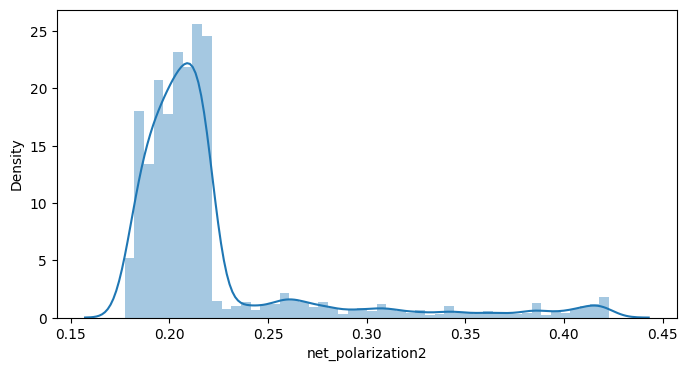

In [14]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot()
import seaborn as sns
sns.distplot(df_1['net_polarization2'],ax=ax)
# sns.distplot(final_data1['pol_inclination'],ax=ax)
plt.show()

ShapiroResult(statistic=0.6325036883354187, pvalue=0.0)

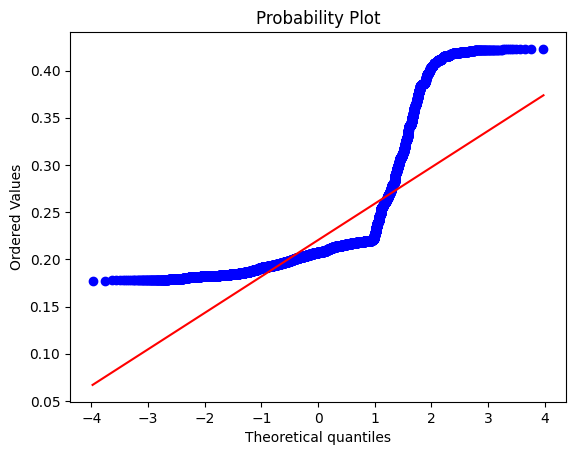

In [18]:
stats.probplot(df_1['net_polarization2'], dist="norm", plot=plt)
stats.shapiro(df_1['net_polarization2'])
# stats.probplot(df_1['network_polarization'], dist="norm", plot=plt)

ShapiroResult(statistic=0.910680890083313, pvalue=3.4878416954597924e-06)

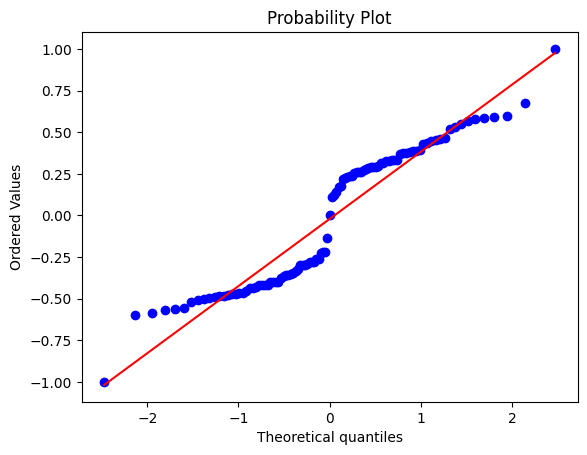

In [19]:
initial_data_ = pd.read_csv('initial_data/initial_data_1.csv')

stats.probplot(initial_data_['pol_inclination'], dist="norm", plot=plt)
stats.shapiro(initial_data_['pol_inclination'])

In [156]:
none_se_data.columns

Index(['Unnamed: 0', 'party_mentioned', 'post_stance', 'author_id',
       'num_of_agents_received', 'num_of_agents_not_received',
       'num_of_spreader_agents', 'num_of_disinterested_agents',
       'network_polarization', 'net_polarization2', 'network_homophily',
       'network_homophily2', 'network_polarity', 'user_satisfaction',
       'user_activity'],
      dtype='object')

## Non-parametric Statistical Significance Testing (Comparing overall network metrics for different levels of SE and TOL)

In [20]:
from scipy.stats import kruskal
none_se_data = pd.read_csv('results/SE/results_combined_None_SE.csv')
attr = 'net_polarization2'
for se_lev in ['low', 'med', 'high']:
    final_data = pd.read_csv('results/SE/results_combined_' + se_lev + '_SE.csv')
    print(se_lev, "\t", kruskal(none_se_data[attr], final_data[attr]))
    print()

low 	 KruskalResult(statistic=26910.49229117244, pvalue=0.0)

med 	 KruskalResult(statistic=11114.926804469345, pvalue=0.0)

high 	 KruskalResult(statistic=5355.349569944927, pvalue=0.0)



In [22]:
from pingouin import kruskal
none_se_data = pd.read_csv('results/SE/results_combined_None_SE.csv')
attr = 'network_homophily'
for se_lev in ['low', 'med', 'high']:
    final_data = pd.read_csv('results/SE/results_combined_' + se_lev + '_SE.csv')
    none_se_data['SE_level'] = ['none'] * none_se_data.shape[0]
    final_data['SE_level'] = [se_lev] * final_data.shape[0]
    temp_df = pd.concat((none_se_data, final_data), axis = 0)
    kwTest = kruskal(temp_df, dv=attr, between='SE_level')
    H = kwTest.H[0]
    n = temp_df.shape[0]
    esq = H * (n + 1)/(n**2 - 1)
    print(se_lev, "\t", kwTest, "\t", esq)

low 	            Source  ddof1            H  p-unc
Kruskal  SE_level      1  6082.349613    0.0 	 0.1521233927585415
med 	            Source  ddof1             H  p-unc
Kruskal  SE_level      1  14615.577135    0.0 	 0.3655447849078076
high 	            Source  ddof1           H         p-unc
Kruskal  SE_level      1  316.970396  6.619487e-71 	 0.007927629134636797


In [23]:
attrs = ['net_polarization2', 'network_homophily', 'network_polarity', 'user_satisfaction']

In [24]:
from pingouin import kruskal
none_se_data = pd.read_csv('results/SE/results_combined_None_SE.csv')
attr = attrs[1]
for se_lev in ['low', 'med', 'high']:
    final_data = pd.read_csv('results/SE/results_combined_' + se_lev + '_SE.csv')
    none_se_data['SE_level'] = ['none'] * none_se_data.shape[0]
    final_data['SE_level'] = [se_lev] * final_data.shape[0]
    temp_df = pd.concat((none_se_data, final_data), axis = 0)
    kwTest = kruskal(temp_df, dv=attr, between='SE_level')
    H = kwTest.H[0]
    n = temp_df.shape[0]
    esq = H * (n + 1)/(n**2 - 1)
    print(se_lev, "\t", kwTest, "\t", esq)

low 	            Source  ddof1            H  p-unc
Kruskal  SE_level      1  6082.349613    0.0 	 0.1521233927585415
med 	            Source  ddof1             H  p-unc
Kruskal  SE_level      1  14615.577135    0.0 	 0.3655447849078076
high 	            Source  ddof1           H         p-unc
Kruskal  SE_level      1  316.970396  6.619487e-71 	 0.007927629134636797


In [25]:
from pingouin import kruskal
attr = attrs[1]
for tol_lev in [('low', 'med'), ('med', 'high'), ('low', 'high')]:
    tol1 = tol_lev[0]
    tol2 = tol_lev[1]
    df1 = pd.read_csv('results/SE/results_combined_' + tol1 + '_SE.csv')
    df2 = pd.read_csv('results/SE/results_combined_' + tol2 + '_SE.csv')
    df1['TOL_level'] = [tol1] * df1.shape[0]
    df2['TOL_level'] = [tol2] * df2.shape[0]
    temp_df = pd.concat((df1, df2), axis = 0)
    kwTest = kruskal(temp_df, dv=attr, between='TOL_level')
    H = kwTest.H[0]
    n = temp_df.shape[0]
    esq = H * (n + 1)/(n**2 - 1)
    print((tol1, tol2), "\t", kwTest, "\t", esq)
#     print(tol_lev, "\t", kruskal(df1[attr].iloc[0:1000], df2[attr].iloc[0:1000]))
    print()

('low', 'med') 	             Source  ddof1            H  p-unc
Kruskal  TOL_level      1  8033.577283    0.0 	 0.20092482513682625

('med', 'high') 	             Source  ddof1             H  p-unc
Kruskal  TOL_level      1  12828.069743    0.0 	 0.32083809977010114

('low', 'high') 	             Source  ddof1            H  p-unc
Kruskal  TOL_level      1  2017.381064    0.0 	 0.0504559703919571



In [26]:
none_se_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'topic', 'post_stance', 'author_id',
       'num_of_agents_received', 'num_of_agents_not_received',
       'num_of_spreader_agents', 'num_of_disinterested_agents',
       'network_polarization', 'net_polarization2', 'network_homophily',
       'network_homophily2', 'network_polarity', 'satisfaction', 'activity',
       'user_preference', 'SE_level'],
      dtype='object')

## Parametric Statistical Significance Testing (Comparing user attributes across different levels of SE)

In [151]:
from scipy.stats import ttest_rel, f_oneway

In [27]:
initial_data = pd.read_csv('src/data/initial_data_1.csv')
none_se_data = pd.read_csv('results/final_results/SE_avg/final_data_none.csv')
attr = 'pol_inclination'
for se_lev in ['low', 'med', 'high']:
    final_data = pd.read_csv('results/final_results/SE_avg/final_data_' + se_lev + '.csv')
    print(se_lev, "\t", ttest_rel(none_se_data[attr], final_data[attr]))
    print(se_lev, "\t", f_oneway(none_se_data[attr], final_data[attr]))
    none_se_data['SE_level'] = ['none'] * none_se_data.shape[0]
    final_data['SE_level'] = [se_lev] * final_data.shape[0]
    temp_df = pd.concat((none_se_data, final_data), axis = 0)
    print(galss_delta(temp_df, attr, 'SE_level'))
    print(cohens_d(temp_df, attr, 'SE_level'))
    print()

FileNotFoundError: [Errno 2] No such file or directory: 'src/data/initial_data_1.csv'

In [241]:
initial_data = pd.read_csv('src/data/initial_data_1.csv')
attr = 'pol_inclination'
for tol_lev in [('low', 'med'), ('med', 'high'), ('low', 'high')]:
    tol1 = tol_lev[0]
    tol2 = tol_lev[1]
    df1 = pd.read_csv('results/final_results/TOL_avg/final_data_' + tol1 + '.csv')
    df2 = pd.read_csv('results/final_results/TOL_avg/final_data_' + tol2 + '.csv')
    
    print(tol_lev, "\t", ttest_rel(df1[attr], df2[attr]))
    print(tol_lev, "\t", f_oneway(df1[attr], df2[attr]))
    df1['TOL_level'] = [tol1] * df1.shape[0]
    df2['TOL_level'] = [tol2] * df2.shape[0]
    temp_df = pd.concat((df1, df2), axis = 0)
    print(galss_delta(temp_df, attr, 'TOL_level'))
    print(cohens_d(temp_df, attr, 'TOL_level'))
    print()

('low', 'med') 	 Ttest_relResult(statistic=1.3458769974450495, pvalue=0.17841774531539958)
('low', 'med') 	 F_onewayResult(statistic=1.076195442338444, pvalue=0.2995812824927048)
0.022459804982167243
0.02308466866509659

('med', 'high') 	 Ttest_relResult(statistic=0.7228518384522137, pvalue=0.46981277930647525)
('med', 'high') 	 F_onewayResult(statistic=0.2614795180483579, pvalue=0.6091195029813835)
0.0116176558996652
0.011378811660922035

('low', 'high') 	 Ttest_relResult(statistic=2.058895338652016, pvalue=0.03956826421359188)
('low', 'high') 	 F_onewayResult(statistic=2.412527050961528, pvalue=0.12040710290046534)
0.03637002963351754
0.034563217721917304



In [79]:
temp_df['SE_level'].value_counts()

none    1000
high    1000
Name: SE_level, dtype: int64

# Effect Size

In [31]:
var1 = 'low'
var2 = 'high'
attr = 'net_polarization2'

df1 = pd.read_csv('results/SE/results_combined_' + var1 + '_SE.csv')
df2 = pd.read_csv('results/SE/results_combined_' + var2 + '_SE.csv')
df1['EXP'] = [var1] * df1.shape[0]
df2['EXP'] = [var2] * df2.shape[0]
temp_df = pd.concat((df1, df2), axis = 0)

### Cohen's d

In [32]:
import numpy as np

def cohens_d(df, attr, control_var):

    # Variances
    variances = df.groupby(control_var).var(ddof=1)
    # Mean variance
    mean_var = variances.mean()[attr]
    # Pooled standard deviation
    s_pooled = np.sqrt(mean_var)
    # Difference of the means
    diff_mean = abs(df.groupby(control_var).mean().diff()[attr][-1])
    # Cohen's d
    cohens_d = diff_mean / s_pooled
    
    return cohens_d

cohens_d(temp_df, 'net_polarization2', 'EXP')

4.019367546336394

In [ ]:
# import numpy as np
# import pingouin as pg
# x = temp_df[temp_df['EXP'] == var1][attr]
# y = temp_df[temp_df['EXP'] == var2][attr]
# pg.compute_effsize(x, y, paired=False, eftype='cohen')

### Glass's delta

In [179]:
# Variances
def galss_delta(df, attr, control_var):
    
    variances = df.groupby(control_var).var(ddof=1)
    # Difference of the means
    diff_mean = abs(df.groupby(control_var).mean().diff()[attr][-1])
    # Glass's delta
    glasss_delta = diff_mean / np.sqrt(variances[attr].to_list()[0])

    return glasss_delta

# galss_delta(temp_df, 'net_polarization2', 'EXP')

### Epsilon Square (For Kruskal-Wallis test)

In [110]:
from pingouin import kruskal
def epsilon_square(df, attr, control_var):

    kwTest = kruskal(df, dv=attr, between=control_var)
    H = kwTest.H[0]
    n = df.shape[0]
    esq = H * (n + 1)/(n**2 - 1)
    print(esq)
    
epsilon_square(temp_df, 'net_polarization2', 'EXP')

0.2524845375865879


In [207]:
none_se_data.columns, med_tol_data.columns

(Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'user_activity', 'pol_interest',
        'privacy_preference', 'user_satisfaction', 'issue_0', 'issue_1',
        'issue_2', 'issue_3', 'issue_4', 'issue_5', 'pol_inclination',
        'SE_level'],
       dtype='object'),
 Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'user_activity', 'pol_interest',
        'privacy_preference', 'user_satisfaction', 'issue_0', 'issue_1',
        'issue_2', 'issue_3', 'issue_4', 'issue_5', 'pol_inclination',
        'SE_level'],
       dtype='object'))

In [208]:
from pingouin import kruskal
none_se_data = pd.read_csv('results/final_results/SE_avg/final_data_none.csv')
med_tol_data = pd.read_csv('results/final_results/TOL_avg/final_data_med.csv')
attr = 'pol_inclination'

none_se_data['SE_level'] = ['none'] * none_se_data.shape[0]
med_tol_data['SE_level'] = ['med'] * med_tol_data.shape[0]
temp_df = pd.concat((none_se_data, med_tol_data), axis = 0)
kwTest = kruskal(temp_df, dv=attr, between='SE_level')
H = kwTest.H[0]
n = temp_df.shape[0]
esq = H * (n + 1)/(n**2 - 1)
print(se_lev, "\t", kwTest, "\t", esq)

high 	            Source  ddof1         H     p-unc
Kruskal  SE_level      1  2.396003  0.121646 	 0.0002966451962983735
